<a href="https://colab.research.google.com/github/shipleydm/IS8036_PROJECT/blob/main/IS8036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Packages

In [ ]:
# !pip install verstack

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.utils

import lightgbm as lgb
from lightgbm import LGBMModel
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.utils import parallel
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from verstack import LGBMTuner



import scipy
from scipy.sparse import hstack

from google.colab import drive

Bringing Data In

In [3]:
drive.mount('/content/drive')

dir = '/content/drive/My Drive/IS8036/AirBnB/DatCleanData'

# dir = '/content/drive/MyDrive/IS8036/AirBnB/DatCleanData'

listing_data=pd.read_csv(dir+'/CLEANLISTINGS.csv')
# review_data=pd.read_csv(dir+'/reviews.csv')
# neighborhood_data=pd.read_csv(dir+'/neighbourhoods.csv')

Mounted at /content/drive


In [4]:
listing_data.head(5)

,intListingID,strListingURL,boolInstantlyBookable,boolGuestProfilePicReqToBook,boolVerifiedGuestPhoneReqToBook,dtListingLastScraped,dtListingBookingCalendarLastScraped,dtListingFirstReview,intDaysSinceFirstReview,dtListingLastReview,...,boolHasAirConditioning,boolHasKitchen,boolHasHotWater,boolGuestPetsAllowed,boolHasTV,boolHasPool,boolHasHotTub,boolHasEVCharger,boolHasCable,boolHasInternet
0,10185917,https://www.airbnb.com/rooms/10185917,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
1,10681596,https://www.airbnb.com/rooms/10681596,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,1,1
2,10886705,https://www.airbnb.com/rooms/10886705,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,1,1,0,0,1,1,0,0,0,1
3,11023946,https://www.airbnb.com/rooms/11023946,0,0,0,2020-05-30,2020-05-30,NaN,NaN,NaN,...,1,1,0,0,1,0,0,0,0,1
4,43160258,https://www.airbnb.com/rooms/43160258,1,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1


In [5]:
# review_data.head(5)

In [6]:
# neighborhood_data.head(5)

In [7]:
listing_data.dtypes

intListingID                        int64
strListingURL                      object
boolInstantlyBookable               int64
boolGuestProfilePicReqToBook        int64
boolVerifiedGuestPhoneReqToBook     int64
                                    ...  
boolHasPool                         int64
boolHasHotTub                       int64
boolHasEVCharger                    int64
boolHasCable                        int64
boolHasInternet                     int64
Length: 163, dtype: object

id

listing_url

scrape_id

last_scraped

name

summary

space

description

experiences_offered

neighborhood_overview

notes

transit

access

interaction

house_rules

thumbnail_url

medium_url

picture_url

xl_picture_url

host_id

host_url

host_name

host_since

host_location

host_about

host_response_time

host_response_rate

host_acceptance_rate

host_is_superhost

host_thumbnail_url

host_picture_url

host_neighbourhood

host_listings_count

host_total_listings_count

host_verifications

host_has_profile_pic

host_identity_verified

street

neighbourhood

neighbourhood_cleansed

neighbourhood_group_cleansed

city

state

zipcode

market

smart_location

country_code

country

latitude

longitude

is_location_exact

property_type

room_type

accommodates

bathrooms

bedrooms

beds

bed_type

amenities

square_feet

price

weekly_price

monthly_price

security_deposit

cleaning_fee

guests_included

extra_people

minimum_nights

maximum_nights

minimum_minimum_nights

maximum_minimum_nights

minimum_maximum_nights

maximum_maximum_nights

minimum_nights_avg_ntm

maximum_nights_avg_ntm

calendar_updated

has_availability

availability_30

availability_60

availability_90

availability_365

calendar_last_scraped

number_of_reviews

number_of_reviews_ltm

first_review

last_review

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

requires_license

license

jurisdiction_names

instant_bookable

is_business_travel_ready

cancellation_policy

require_guest_profile_picture

require_guest_phone_verification

calculated_host_listings_count

calculated_host_listings_count_entire_homes

calculated_host_listings_count_private_rooms

calculated_host_listings_count_shared_rooms

reviews_per_month

Cleaning/EDA/T-tests

Linear Regression

## Narrowing Down Predictors and Exploring

In [163]:
# reading the csv file using read_csv
# storing the data frame in variable called df
df = pd.read_csv(dir+'/KeepingColumns.csv', encoding="ISO-8859-1")
 
# creating a list of column names by
# calling the .columns
list_of_columns_to_keep = list(df.columns)
 
# displaying the list of column names
# print(list_of_columns_to_keep)

In [164]:
listing_df = listing_data.loc[:, list_of_columns_to_keep]
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   boolInstantlyBookable                        7221 non-null   int64  
 1   boolGuestProfilePicReqToBook                 7221 non-null   int64  
 2   boolVerifiedGuestPhoneReqToBook              7221 non-null   int64  
 3   intDaysSinceFirstReview                      5912 non-null   float64
 4   intDaysSinceLastReview                       5912 non-null   float64
 5   intDaysSinceLastBookingCalendarUpdate        7162 non-null   float64
 6   cintNeighborhood                             7221 non-null   int64  
 7   cintZipCode                                  7221 non-null   int64  
 8   cintPropertyType                             7221 non-null   int64  
 9   ointRoomType                                 7221 non-null   int64  
 10  

In [165]:
# Define the columns to drop and the target variable
# going ahead and removing this host info as well, not being used for predictors
remove_cols = ['strHostNeighborhood', 'strHostCity', 'strHostStateProv', 'strHostCountry']
for name in remove_cols:
  if name in list_of_columns_to_keep:
    list_of_columns_to_keep.remove(name)

# final dataset with columns kept
listing_df = listing_df.loc[:, list_of_columns_to_keep]

In [166]:
# model inputs
# predictors = list_of_columns_to_keep       
# target = 'intDailyPrice'

# Split the data into training and test sets
df = listing_df # keep copy of original dataframe without the predictor being dropped
df.drop('intDailyPrice', axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41)

df_train.shape

(5776, 89)

<ipython-input-12-8d24f42b623c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation matrix of numerical features')

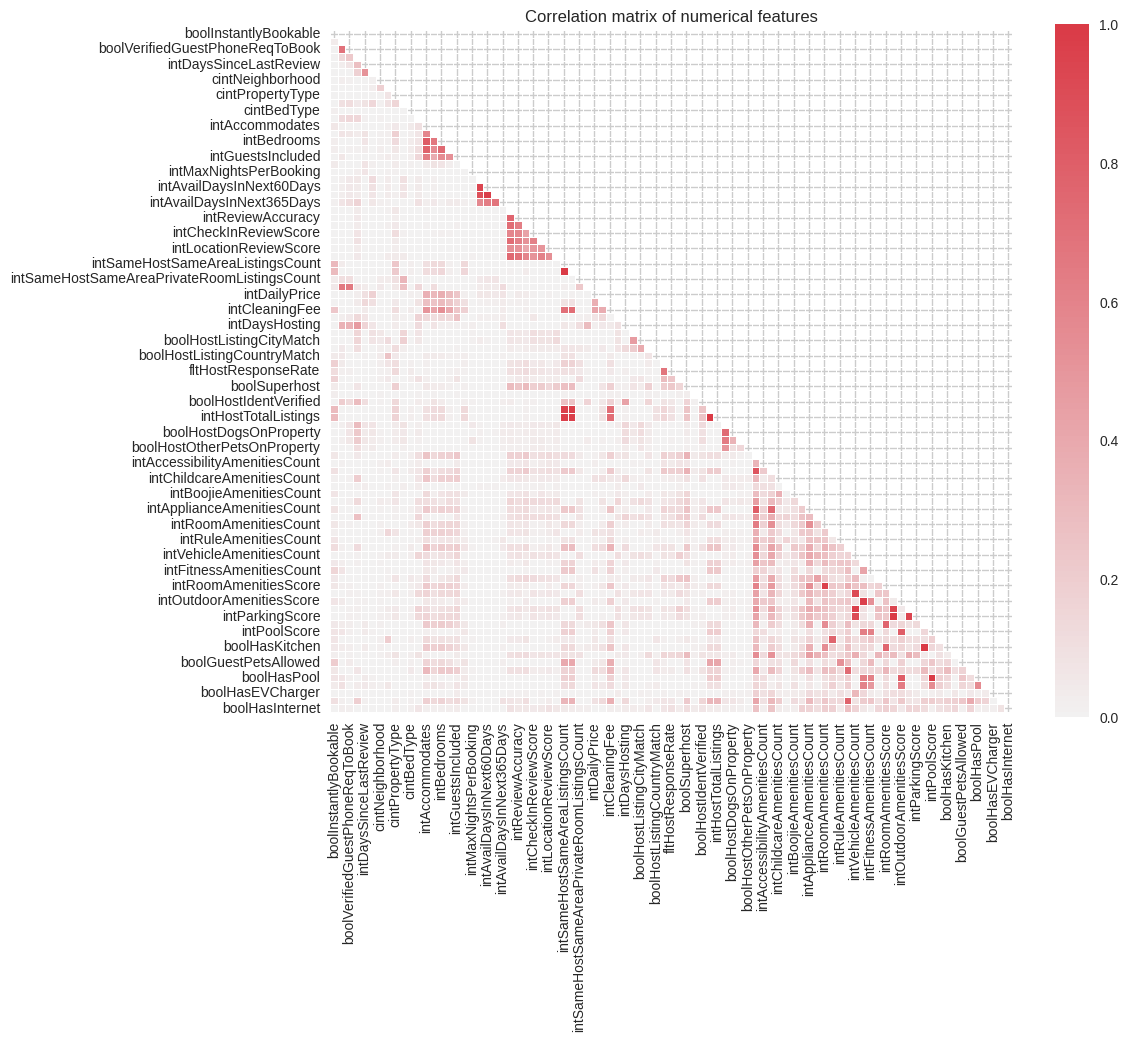

In [12]:
# correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0});
plt.title('Correlation matrix of numerical features')

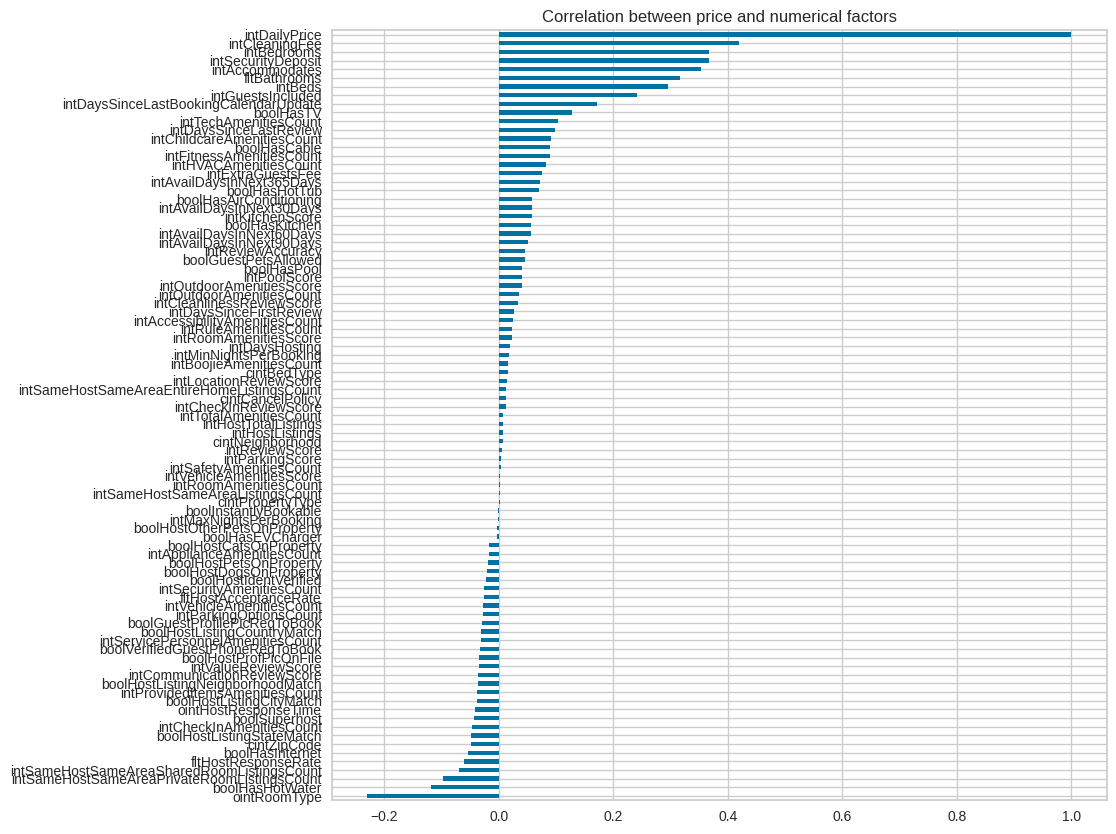

In [13]:
# double check to bring in correct column types
col = df_train.select_dtypes(['float64', 'int', 'int64']).columns

df_train[col].corr() ['intDailyPrice'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10));
plt.title('Correlation between price and numerical factors');

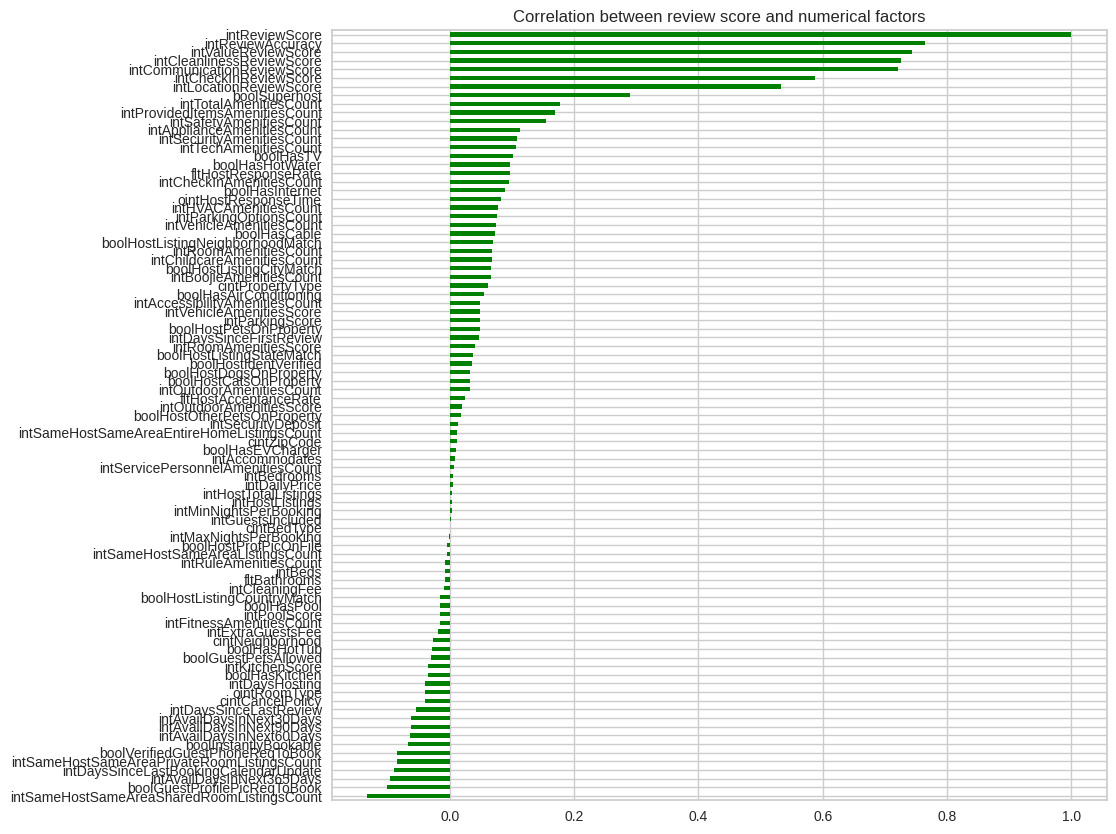

In [14]:
# below is just out of curiosity
df_train[col].corr() ['intReviewScore'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10), color='green');
plt.title('Correlation between review score and numerical factors');

## Light GBM Model

In [15]:
def model_eval(X_train, y_train, X_test, y_test, model):
    '''
    input: X is features data frame, y is response, model
    output: train cross validation score, test score, predicted values
    
    '''
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)        # Array of R^2 scores of the estimator for each run of the cross validation.
    test_score = r2_score(y_test, y_pred)                                           # R^2 (coefficient of determination) regression score function.            
    return score, test_score, y_pred

def plot_features(X, model, name):
    '''
    plot features importance of algoritm
    input: dataframe X and regression model
    output: Feature importance plot
    '''
    print("Plot feature importances…")
    headers = ["name", "score"]
    values = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)
    features = forest_feature_importances['name'][:25]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:25]
    #plot feature importances
    plt.figure(figsize=(13,8))
    plt.barh(y_pos, scores, align='center', alpha=0.5, color='red')
    plt.yticks(y_pos, features, rotation=0)   
    plt.ylabel('Features')
    plt.xlabel('Score')
    plt.title('Feature importances ' + name)
    plt.show()

In [167]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [168]:
model_lgb = lgb.LGBMRegressor(boosting_type ='gbdt', learning_rate = 0.1, num_leaves=31, max_depth =8) 
score, test_score, y_pred_lgbm = model_eval(X, Y, X_test, Y_test, model_lgb)

print('Number of columns is:', df_test.shape[1])
# print(df_test.columns)
print('\n')
print('LGBM Model:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

Number of columns is: 89


LGBM Model:
- Mean of crossvalidation scores: 0.4703167499636411
- r2_score: 0.7441132046550835


LGBM Basic Tune

In [169]:
#
# Trying different model eval method
#
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'metric': {'l2','l1'},
    'verbose': -1
}
 

# loading data
lgb_train = lgb.Dataset(X, Y)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=80)

[1]	valid_0's l1: 116.167	valid_0's l2: 237919
Training until validation scores don't improve for 80 rounds
[2]	valid_0's l1: 110.088	valid_0's l2: 230546
[3]	valid_0's l1: 104.363	valid_0's l2: 223850
[4]	valid_0's l1: 99.9547	valid_0's l2: 218014
[5]	valid_0's l1: 95.631	valid_0's l2: 212366
[6]	valid_0's l1: 92.368	valid_0's l2: 207297
[7]	valid_0's l1: 89.516	valid_0's l2: 202572
[8]	valid_0's l1: 87.0977	valid_0's l2: 198278
[9]	valid_0's l1: 84.8743	valid_0's l2: 195416
[10]	valid_0's l1: 82.5317	valid_0's l2: 190918
[11]	valid_0's l1: 80.8912	valid_0's l2: 186828
[12]	valid_0's l1: 79.4977	valid_0's l2: 183731
[13]	valid_0's l1: 78.3825	valid_0's l2: 181931
[14]	valid_0's l1: 77.3265	valid_0's l2: 178134
[15]	valid_0's l1: 76.5157	valid_0's l2: 175045
[16]	valid_0's l1: 75.4073	valid_0's l2: 172504
[17]	valid_0's l1: 74.9893	valid_0's l2: 169875
[18]	valid_0's l1: 74.5943	valid_0's l2: 167351
[19]	valid_0's l1: 74.1509	valid_0's l2: 164894
[20]	valid_0's l1: 73.7033	valid_0's l2

In [170]:
# prediction
gbm_train_preds = model.predict(X)
gbm_test_preds = model.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Train data accuracy
R2: 0.8347
MSE: 15426.58
RMSE: 124.20
Test data accuracy
R2: 0.7448
MSE: 62835.80
RMSE: 250.67


LGBM Optuna


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 500 trials
     .. Evaluation metric: mse 
     .. Study direction: minimize mean_squared_error

     . Trial number: 0 finished
     .. Optimization score (lower-better): mean_squared_error: 41778.55950956424
     .. Evaluation score (lower-better): mse: 41778.55950956424
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): mean_squared_error: 21853.398678939622
     .. Evaluation score (lower-better): mse: 21853.398678939622
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): mean_squared_error: 45094.81572023496
     .. Evaluation score (lower-better): mse: 45094.81572023496
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): mea

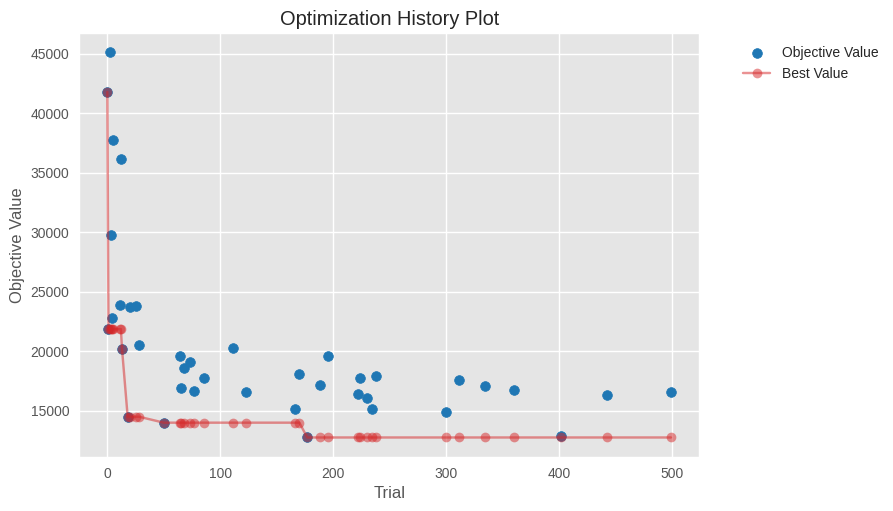

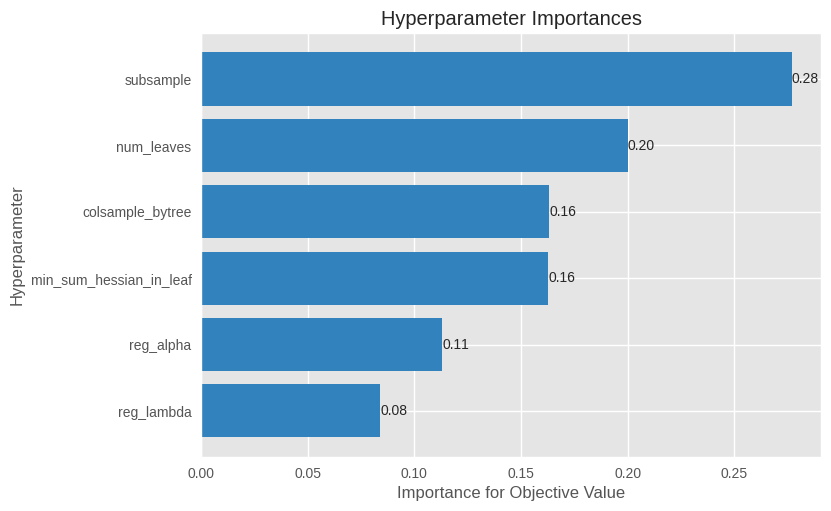

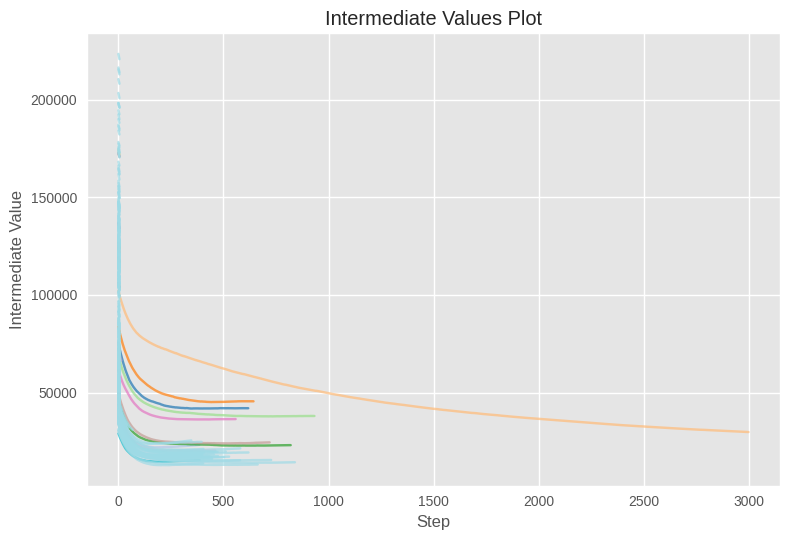

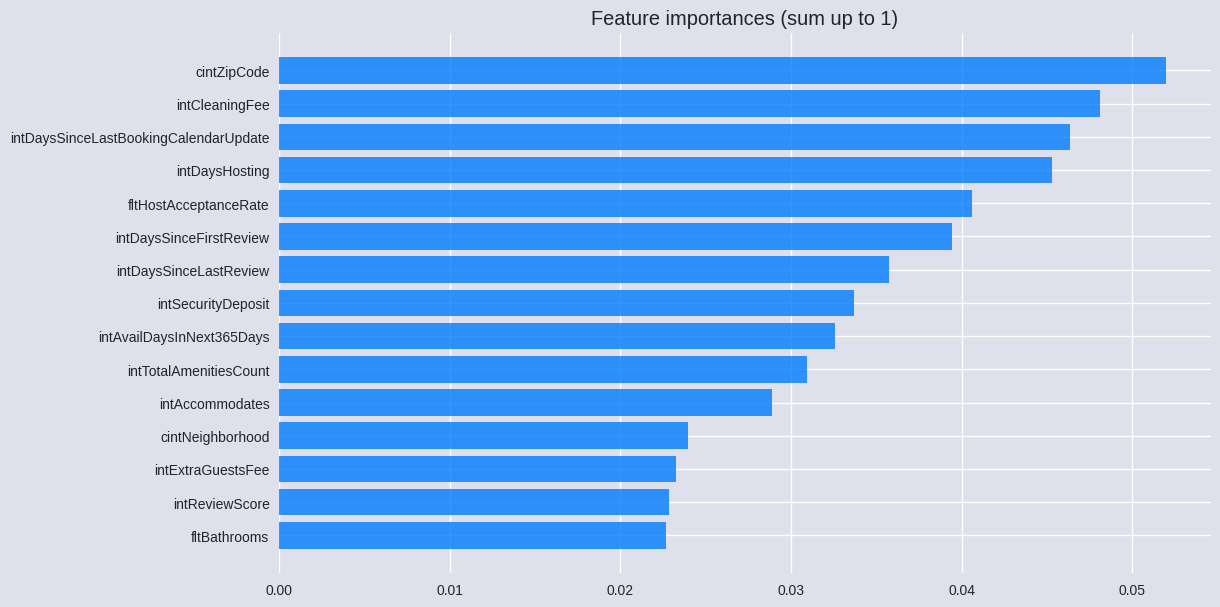


     . Optuna hyperparameters optimization finished
     .. Best trial number:177    |     mean_squared_error:           12747.720189789205
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  284   |     mse:           23917.954888134245

Time elapsed for fit execution: 6 min 49.034 sec


In [52]:
# tune the hyperparameters and fit the optimized model
tuner = LGBMTuner(metric = 'mse', trials = 500) # <- the only required argument
tuner.fit(X, Y)
# check the optimization log in the console.
# pred = tuner.predict(X_test)

In [53]:
# prediction
gbm_train_preds = tuner.predict(X)
gbm_test_preds = tuner.predict(X_test)

# accuracy check
r2_train = r2_score(Y, gbm_train_preds)
mse_train = mean_squared_error(Y, gbm_train_preds)
rmse_train = mse_train**(0.5)
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2 = r2_score(Y_test, gbm_test_preds)
mse = mean_squared_error(Y_test, gbm_test_preds)
rmse = mse**(0.5)
print('Test data accuracy')
print("R2: %.4f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

Test data accuracy
R2: 0.5887
MSE: 38379.09
RMSE: 195.91
Test data accuracy
R2: 0.3773
MSE: 153327.01
RMSE: 391.57


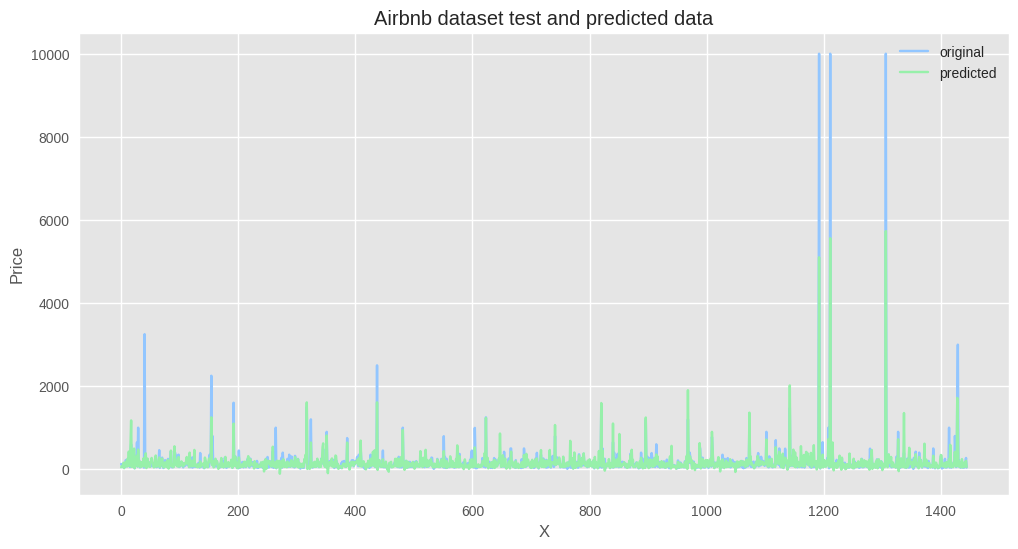

In [80]:
# visualizing in a plot
x_ax = range(len(Y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, Y_test, label="original")
plt.plot(x_ax, gbm_test_preds, label="predicted")
plt.title("Airbnb dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

Plot feature importances…


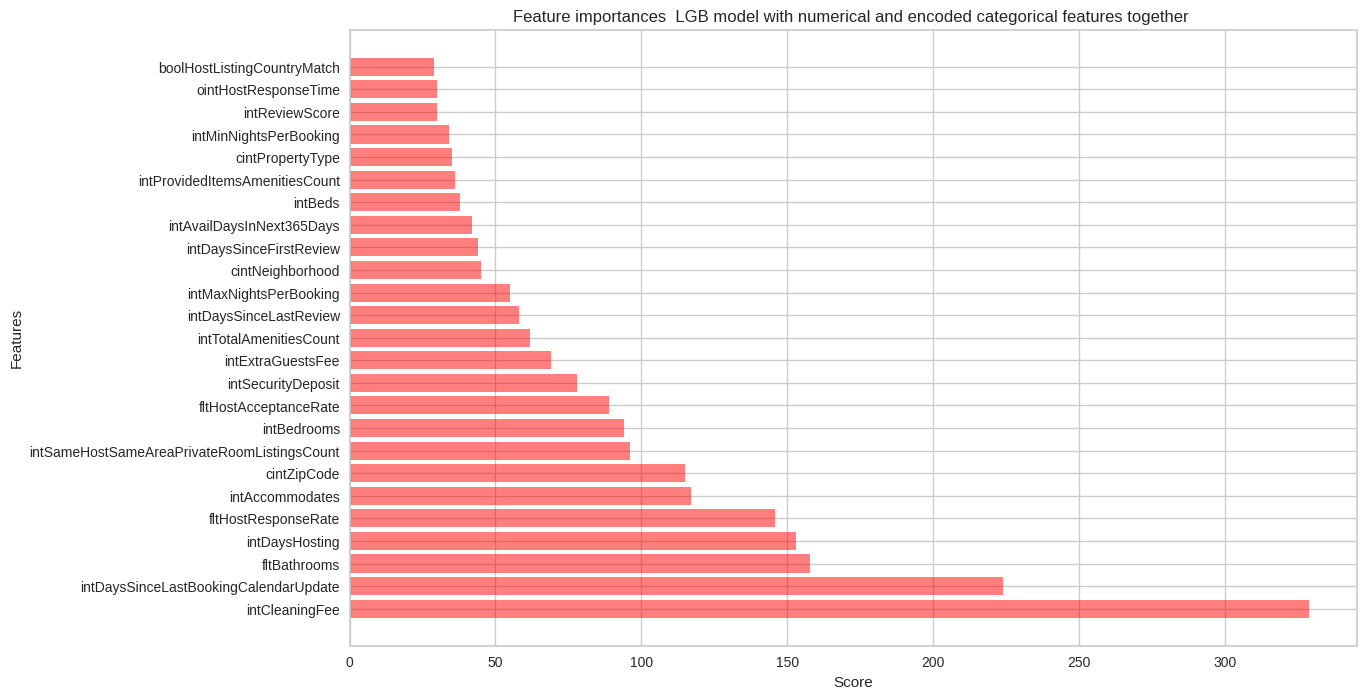

In [ ]:
plot_features(X, model_lgb, " LGB model with numerical and encoded categorical features together ")

## Random Forest Model

In [151]:
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train = df_train.dropna()
df_test = df_test.dropna()

In [152]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [153]:
# model
rfm = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm.fit(X, Y)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [154]:
# prediction
rfm_train_preds = rfm.predict(X)
rfm_test_preds = rfm.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.7248
MSE: 7436.97
RMSE: 86.24
Test data accuracy
R2: 0.6306
MSE: 6152.16
RMSE: 78.44


Plot feature importances…


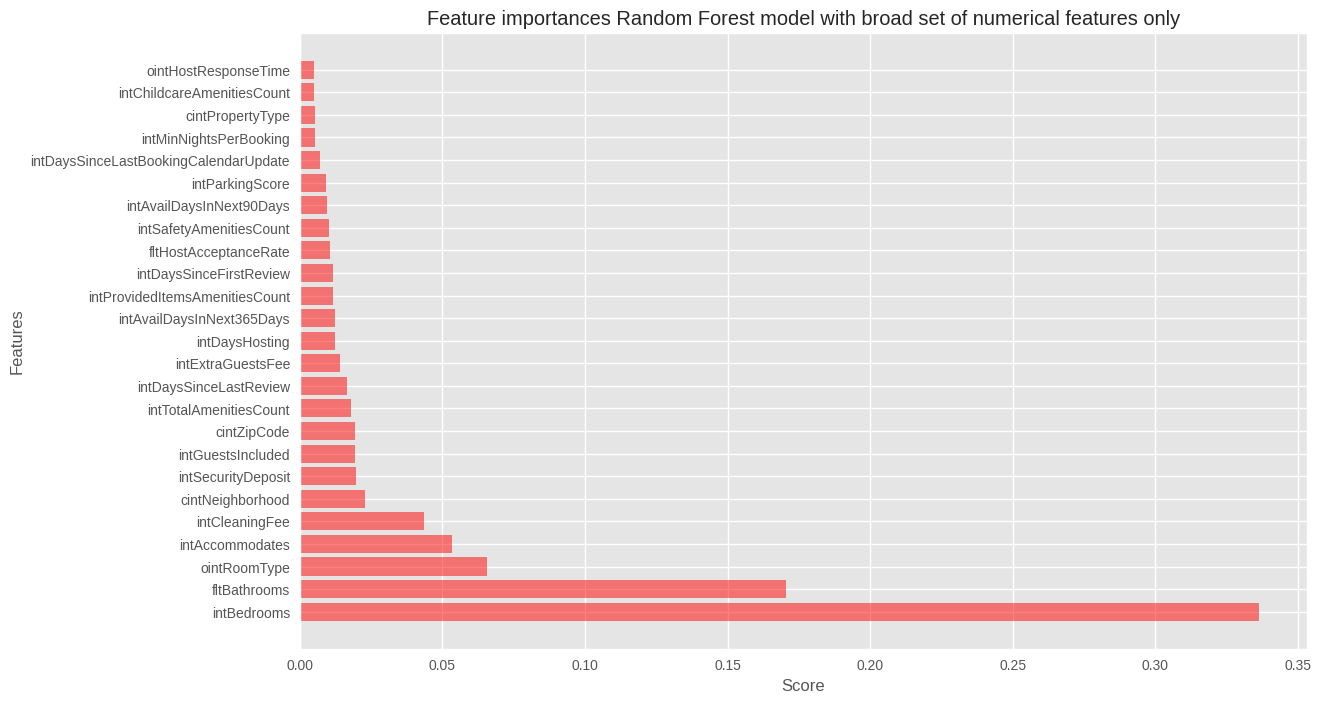

In [104]:
plot_features(X, rfm, "Random Forest model with broad set of numerical features only")

In [134]:
#remove lowest importance values and some of highly correlated, until we have the best result at the end
exc=  ['intAccommodates', 'ointRoomType', 'intCleaningFee', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'cintZipCode', 'intDaysSinceFirstReview', 'intExtraGuestsFee']

col1 = [i for i in col if i in exc]
print('Number of columns is:', len(col1))
print(col1)
X = df_train[col1]
X_test = df_test[col1]

# model - reduced
rfm_r = RandomForestRegressor(n_estimators=30,                
                            #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                            random_state=3, 
                            n_jobs=-1,
                            min_samples_leaf=3,
                            max_depth=5)
rfm_r.fit(X, Y)

Number of columns is: 9
['intDaysSinceFirstReview', 'cintZipCode', 'ointRoomType', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'intCleaningFee', 'intExtraGuestsFee']


RandomForestRegressor(max_depth=5, min_samples_leaf=3, n_estimators=30,
                      n_jobs=-1, random_state=3)

In [135]:
# prediction
rfm_train_preds = rfm_r.predict(X)
rfm_test_preds = rfm_r.predict(X_test)

# accuracy check
r2_train = r2_score(Y, rfm_train_preds)
mse_train = mean_squared_error(rfm_train_preds, Y)
rmse_train = sqrt(mean_squared_error(rfm_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, rfm_test_preds)
mse_test = mean_squared_error(rfm_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(rfm_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.6973
MSE: 8179.67
RMSE: 90.44
Train data accuracy
R2: 0.6324
MSE: 6120.89
RMSE: 78.24


## KNN 

In [155]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [156]:
# Begin with a trail value for K around 3
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X,Y)
pred=knn.predict(X_test)

In [157]:
# prediction
knn_train_preds = knn.predict(X)
knn_test_preds = knn.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.5874
MSE: 11147.87
RMSE: 105.58
Test data accuracy
R2: 0.2161
MSE: 13052.90
RMSE: 114.25


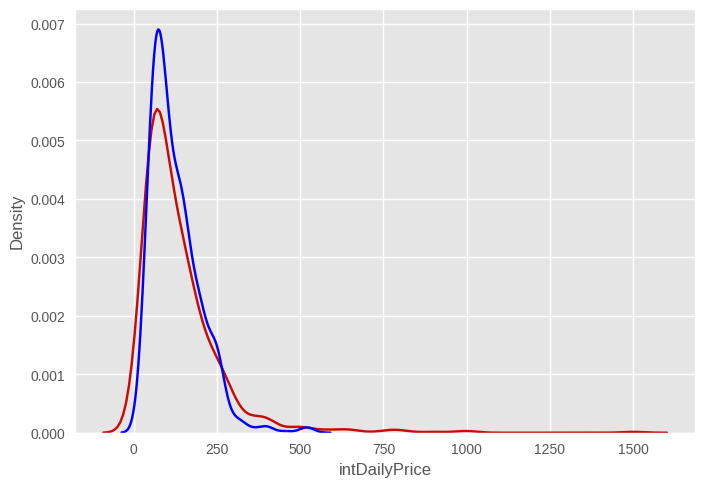

In [141]:
# Plotting the distribution plot
ax1=sns.distplot(Y_test,hist=False,color='r',label='actual value')
ax2=sns.distplot(pred,hist=False,color='blue',label='predicted value')

In [142]:
# Calculate RMSE for finding the optimal value of K
rmse=list()
rmse1=list()
new=list()
mylist=list(range(50))
mylist=list(filter(lambda x:x%2!=0,mylist))
for k in mylist:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X,Y)
    pred=knn.predict(X_test)
    pred1=knn.predict(X)
    error=sqrt(mean_squared_error(Y_test,pred)) 
    error1=sqrt(mean_squared_error(Y,pred1))
    rmse.append(error)
    new.append([error,k])
    rmse1.append(error1)
    print('RMSE test value for k= ' , k , 'is:', error, '\nRMSE train value for k is = ',error1)

RMSE test value for k=  1 is: 115.96092689852121 
RMSE train value for k is =  0.0
RMSE test value for k=  3 is: 114.24930432114773 
RMSE train value for k is =  105.58348203865965
RMSE test value for k=  5 is: 116.49291226064003 
RMSE train value for k is =  119.1994692323935
RMSE test value for k=  7 is: 118.04640636736623 
RMSE train value for k is =  129.675842109768
RMSE test value for k=  9 is: 113.53627287739691 
RMSE train value for k is =  134.26439525880212
RMSE test value for k=  11 is: 107.04764901277778 
RMSE train value for k is =  136.98992456799738
RMSE test value for k=  13 is: 107.34284522707176 
RMSE train value for k is =  138.8234240492767
RMSE test value for k=  15 is: 107.85773621008761 
RMSE train value for k is =  139.85962228967358
RMSE test value for k=  17 is: 108.7603131290307 
RMSE train value for k is =  141.62721219423284
RMSE test value for k=  19 is: 109.4699038469734 
RMSE train value for k is =  143.54070072403854
RMSE test value for k=  21 is: 109.9

In [143]:
# Creating a list of RMSE values
newList=list()
for x in mylist:
    newList.append(1/x)

In [144]:
# Finding the minimum RMSE for testing data,which is optimal K value
Rmsetest=min(new)
print("Minimum R squared test error=",Rmsetest[0])
Rmsetrain=min(rmse1)
print("Minimum R squared train error=",Rmsetrain)
print("Optimal K value= ",Rmsetest[1])

Minimum R squared test error= 107.04764901277778
Minimum R squared train error= 0.0
Optimal K value=  11


Text(0, 0.5, 'R squared test error')

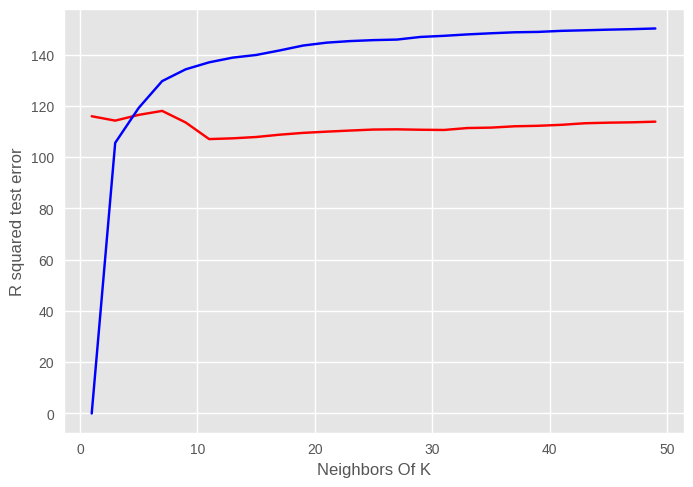

In [145]:
# Plot graph between RMSE value and K value
plt.plot(mylist,rmse,color='red')
plt.plot(mylist,rmse1,color='blue')
plt.xlabel('Neighbors Of K')
plt.ylabel('R squared test error')

In [159]:
# find R2 with optimal K
knn_optimal=KNeighborsRegressor(n_neighbors=11)
knn_optimal.fit(X,Y)

KNeighborsRegressor(n_neighbors=11)

In [158]:
# prediction
knn_train_preds = knn_optimal.predict(X)
knn_test_preds = knn_optimal.predict(X_test)

# accuracy check
r2_train = r2_score(Y, knn_train_preds)
mse_train = mean_squared_error(knn_train_preds, Y)
rmse_train = sqrt(mean_squared_error(knn_train_preds, Y))
print('Train data accuracy')
print("R2: %.4f" % r2_train)
print("MSE: %.2f" % mse_train)
print("RMSE: %.2f" % rmse_train) 

r2_test = r2_score(Y_test, knn_test_preds)
mse_test = mean_squared_error(knn_test_preds, Y_test)
rmse_test = sqrt(mean_squared_error(knn_test_preds, Y_test))
print('Test data accuracy')
print("R2: %.4f" % r2_test)
print("MSE: %.2f" % mse_test)
print("RMSE: %.2f" % rmse_test) 

Train data accuracy
R2: 0.3055
MSE: 18766.24
RMSE: 136.99
Test data accuracy
R2: 0.3119
MSE: 11459.20
RMSE: 107.05


Extreme Gradient Boosting

In [ ]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X_train_df = df_train[col]
X_test_df = df_test[col]
Y_train_label = df_train['intDailyPrice']
Y_test_label = df_test['intDailyPrice']

dtrain = xgb.DMatrix(X_train_df, label=Y_train_label)
dtest = xgb.DMatrix(X_test_df, label=Y_test_label)

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [ ]:
# Parameter dictionary specifying base learner
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50)]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}
bst = xgb.train(param, dtrain, num_round, watchlist, evals_result=evals_result)

print('Access RMSE metric directly from evals_result:')
print(evals_result['eval']['rmse'])

print('Access MAE metric directly from evals_result:')
print(evals_result['eval']['mae'])

print('Access MAPE metric directly from evals_result:')
print(evals_result['eval']['mape'])

# Instantiate an XGBoost object with hyperparameters
param = [('max_depth', 4), ('objective', 'reg:squarederror'), ('eval_metric', 'rmse'), ('eval_metric', 'mae'), ('eval_metric', 'mape'),
         ('early_stopping_rounds', 50),('learning_rate', 0.1),('n_jobs',4),('booster','gbtree')]

num_round = 500
watchlist = [(dtrain,'train'), (dtest,'eval')]

evals_result = {}

[0]	train-rmse:169.00587	train-mae:99.10677	train-mape:0.65837	eval-rmse:145.01188	eval-mae:97.26146	eval-mape:0.66302
[1]	train-rmse:137.31538	train-mae:70.77524	train-mape:0.44053	eval-rmse:117.49479	eval-mae:70.29934	eval-mape:0.45180
[2]	train-rmse:115.23378	train-mae:53.55587	train-mape:0.32713	eval-rmse:101.34189	eval-mae:53.43250	eval-mape:0.33793
[3]	train-rmse:101.19415	train-mae:43.99794	train-mape:0.28619	eval-rmse:91.97187	eval-mae:45.58981	eval-mape:0.30224
[4]	train-rmse:92.13140	train-mae:39.67462	train-mape:0.28064	eval-rmse:90.38607	eval-mae:42.39656	eval-mape:0.29624
[5]	train-rmse:85.55565	train-mae:37.60986	train-mape:0.28839	eval-rmse:88.75041	eval-mae:41.12096	eval-mape:0.30156
[6]	train-rmse:80.84554	train-mae:36.54439	train-mape:0.29866	eval-rmse:90.25332	eval-mae:40.55053	eval-mape:0.31089
[7]	train-rmse:77.60844	train-mae:36.00799	train-mape:0.30876	eval-rmse:89.20997	eval-mae:40.25928	eval-mape:0.32086
[8]	train-rmse:75.06370	train-mae:35.64344	train-mape:0.3

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[9]	train-rmse:72.67729	train-mae:35.18180	train-mape:0.31696	eval-rmse:89.30486	eval-mae:40.29072	eval-mape:0.33085
[10]	train-rmse:71.49287	train-mae:34.81705	train-mape:0.31555	eval-rmse:88.96182	eval-mae:40.06677	eval-mape:0.32941
[11]	train-rmse:70.21137	train-mae:34.45142	train-mape:0.31236	eval-rmse:88.69701	eval-mae:39.74774	eval-mape:0.32524
[12]	train-rmse:68.55362	train-mae:34.22081	train-mape:0.31166	eval-rmse:89.25305	eval-mae:39.76221	eval-mape:0.32626
[13]	train-rmse:67.59763	train-mae:33.93986	train-mape:0.31109	eval-rmse:89.52967	eval-mae:39.94086	eval-mape:0.32950
[14]	train-rmse:66.03264	train-mae:33.55219	train-mape:0.30974	eval-rmse:89.87231	eval-mae:40.02198	eval-mape:0.32906
[15]	train-rmse:65.14793	train-mae:33.32541	train-mape:0.30753	eval-rmse:89.91377	eval-mae:39.81874	eval-mape:0.32568
[16]	train-rmse:64.43188	train-mae:33.19877	train-mape:0.30666	eval-rmse:89.83704	eval-mae:39.85277	eval-mape:0.32689
[17]	train-rmse:63.70608	train-mae:32.88514	train-mape:0.

[0]	validation_0-rmse:216.05656	validation_1-rmse:188.68789
[1]	validation_0-rmse:215.90746	validation_1-rmse:188.53948
[2]	validation_0-rmse:215.75855	validation_1-rmse:188.39126
[3]	validation_0-rmse:215.60983	validation_1-rmse:188.24321
[4]	validation_0-rmse:215.46130	validation_1-rmse:188.09535
[5]	validation_0-rmse:215.31296	validation_1-rmse:187.94767
[6]	validation_0-rmse:215.16482	validation_1-rmse:187.80017
[7]	validation_0-rmse:215.01754	validation_1-rmse:187.65198
[8]	validation_0-rmse:214.86976	validation_1-rmse:187.50483
[9]	validation_0-rmse:214.72285	validation_1-rmse:187.35699
[10]	validation_0-rmse:214.57544	validation_1-rmse:187.21020
[11]	validation_0-rmse:214.42889	validation_1-rmse:187.06272
[12]	validation_0-rmse:214.28186	validation_1-rmse:186.91629
[13]	validation_0-rmse:214.13568	validation_1-rmse:186.76916
[14]	validation_0-rmse:213.98901	validation_1-rmse:186.62308
[15]	validation_0-rmse:213.84321	validation_1-rmse:186.47631


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[20592]	validation_0-rmse:70.34752	validation_1-rmse:78.18308
[20593]	validation_0-rmse:70.34710	validation_1-rmse:78.18273
[20594]	validation_0-rmse:70.34632	validation_1-rmse:78.18269
[20595]	validation_0-rmse:70.34616	validation_1-rmse:78.18265
[20596]	validation_0-rmse:70.34538	validation_1-rmse:78.18169
[20597]	validation_0-rmse:70.34470	validation_1-rmse:78.18182
[20598]	validation_0-rmse:70.34445	validation_1-rmse:78.18160
[20599]	validation_0-rmse:70.34359	validation_1-rmse:78.18150
[20600]	validation_0-rmse:70.34338	validation_1-rmse:78.18168
[20601]	validation_0-rmse:70.34255	validation_1-rmse:78.18087
[20602]	validation_0-rmse:70.34158	validation_1-rmse:78.18020
[20603]	validation_0-rmse:70.34081	validation_1-rmse:78.18016
[20604]	validation_0-rmse:70.34053	validation_1-rmse:78.18005
[20605]	validation_0-rmse:70.34037	validation_1-rmse:78.18018
[20606]	validation_0-rmse:70.34016	validation_1-rmse:78.17999
[20607]	validation_

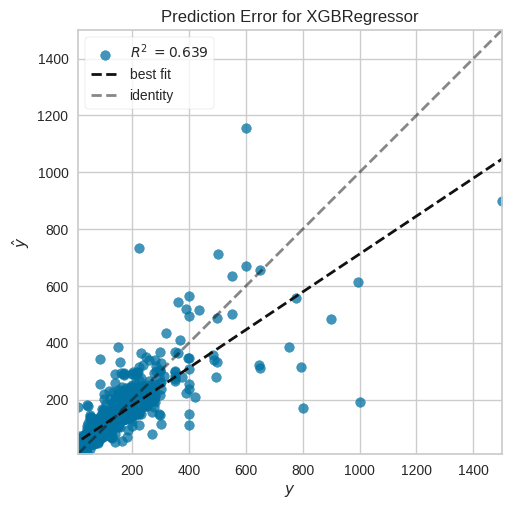

PredictionError(ax=<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=None, booster='gbtree',
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, gpu_...
                                       grow_policy=None, importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=0.001, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_one

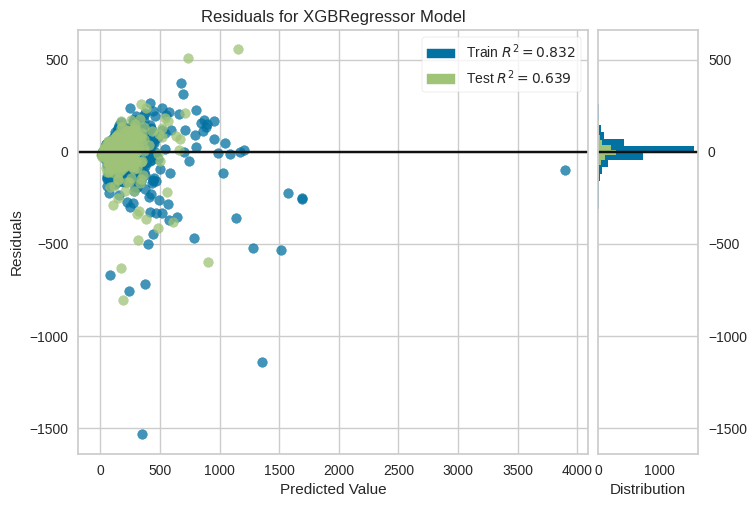

YellowbrickAttributeError: ignored

In [ ]:

xgb_reg = xgb.XGBRegressor(max_depth=2, n_estimators=50000, n_jobs=4,
                           objectvie='reg:squarederror', verbosity = 0,silent=True,
                           booster='gbtree', random_state=42, learning_rate=0.001)

# Train the model with train data sets
xgb_reg.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=100, verbose=0)

y_train_pred = xgb_reg.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb_reg.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))

# Making the Residuals Plot
print("\nResiduals Plot")
print(residuals_plot(xgb_reg, X_train_df, Y_train_label, X_test_df, Y_test_label))


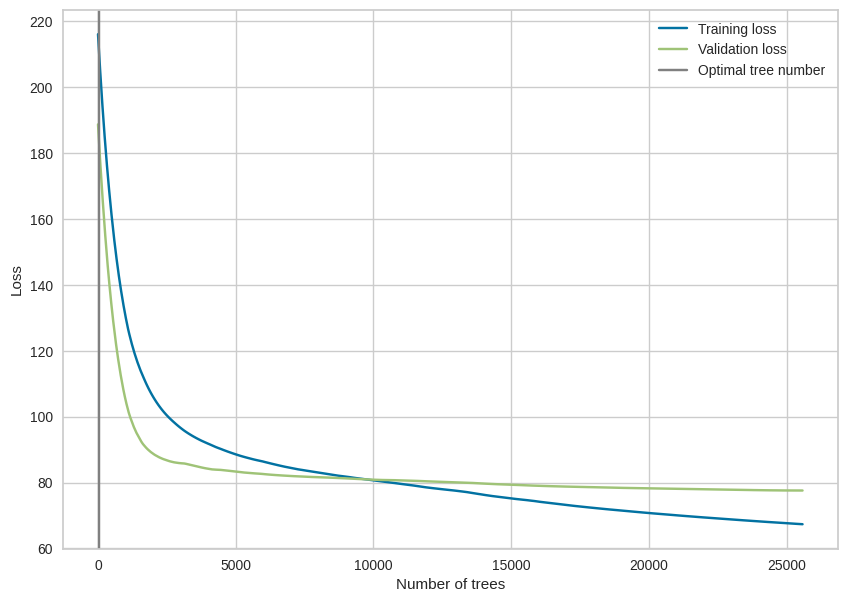

In [ ]:
results = xgb_reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
xgb2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=0.6, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=14,
             min_child_weight=14, monotone_constraints='()',
             n_estimators=100000, n_jobs=36, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Train the model with train data sets
xgb2.fit(X_train_df, Y_train_label,
            eval_set=[(X_train_df, Y_train_label), (X_test_df, Y_test_label)],
            early_stopping_rounds=1000, verbose=1000)

y_train_pred = xgb2.predict(X_train_df) # Predictions
y_train_true = Y_train_label # True values

Train_MSE = mean_squared_error(y_train_true, y_train_pred)
Train_RMSE = np.sqrt(Train_MSE)

Train_R_squared = r2_score(y_train_true, y_train_pred)

print("\nIn Sample RMSE: ", np.round(Train_RMSE, 2))
print()
print("In Sample R-Squared: ", np.round(Train_R_squared, 2))

y_test_pred = xgb2.predict(X_test_df) # Predictions
y_test_true = Y_test_label # True values

Test_MSE = mean_squared_error(y_test_true, y_test_pred)
Test_RMSE = np.sqrt(Test_MSE)

Test_R_squared = r2_score(y_test_true, y_test_pred)

print("\nOut of Sample RMSE: ", np.round(Test_RMSE, 2))
print()
print("Out of Sample R-Squared: ", np.round(Test_R_squared, 2))

[0]	validation_0-rmse:216.08162	validation_1-rmse:188.70427


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1000]	validation_0-rmse:131.18809	validation_1-rmse:104.41033
[2000]	validation_0-rmse:100.75700	validation_1-rmse:80.17671
[3000]	validation_0-rmse:86.83821	validation_1-rmse:73.98074
[4000]	validation_0-rmse:78.60137	validation_1-rmse:72.42151
[5000]	validation_0-rmse:72.39640	validation_1-rmse:71.97775
[6000]	validation_0-rmse:67.29428	validation_1-rmse:71.88750
[7000]	validation_0-rmse:62.87113	validation_1-rmse:71.95298
[7046]	validation_0-rmse:62.67245	validation_1-rmse:71.95697

In Sample RMSE:  67.08

In Sample R-Squared:  0.83

Out of Sample RMSE:  71.87

Out of Sample R-Squared:  0.69


4580


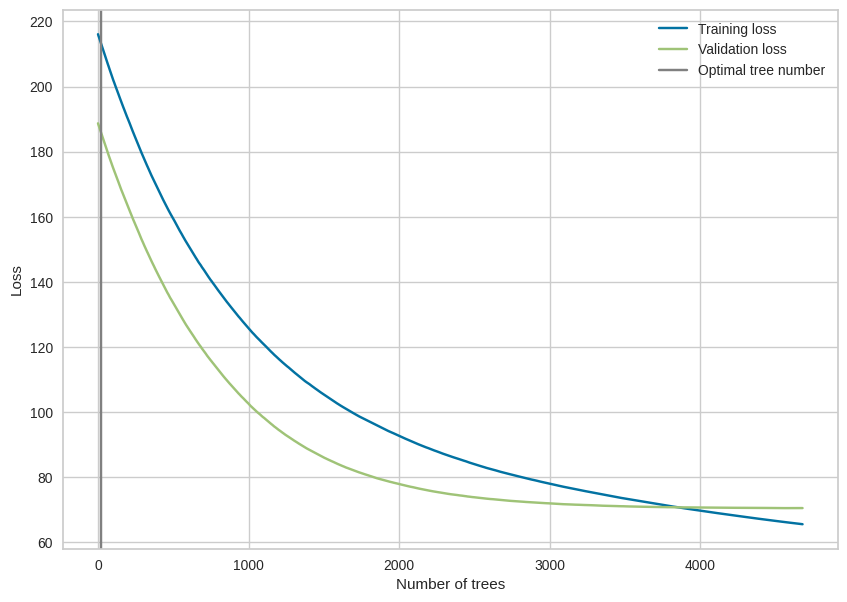

In [ ]:
results = xgb2.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

print(xgb2.best_ntree_limit)